**Note:** Before running this code make sure you go to a *runtime>change runtime type* from "none" to "GPU"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test)= mnist.load_data() #load mnist dataset
 


11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape) #print shape of x and y trainset
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


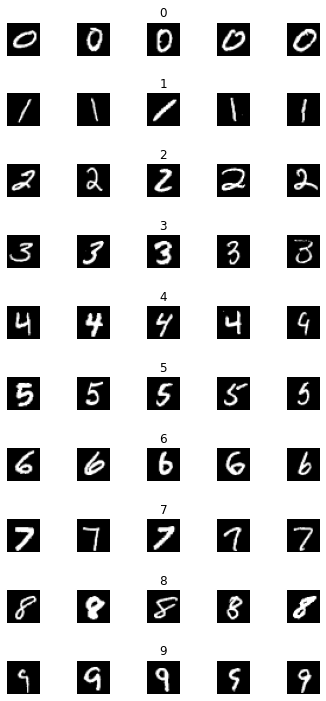

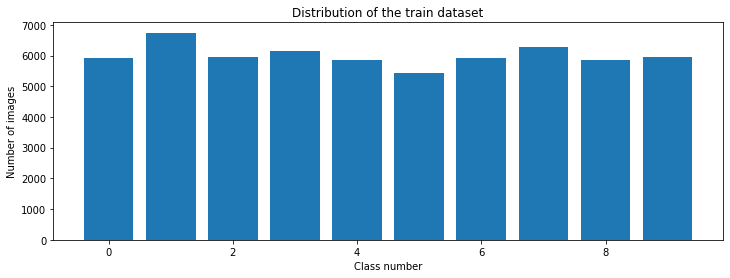

In [6]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [7]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
 
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [8]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #The pooling size is appropriate as it is not too large as to miss relevant features in the convoluted
                                            #image, however, as large enough to help classify our image in a more efficient way. Max pulling scales
                                            #down every feature map into a smaller, abstracted representation.And since we're using it to buy to neighborhood, 
                                            #it makes sense that the image size was reduced to half of what it was previously.
  
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) 

  model.add(Flatten()) #Before processing our image into the neural network, we had to flatten it.We had to flatten each image to be one dimensional.
                       #Well, the fully connected layer, just like what we have here, is just a multilayered Perceptron whereeach node in one layer 
                       #is connected to every other node in the previous one. we add the flattened layer to simply flatten our dataset.
                       #This is very important to do as we are now going to take our convoluted data and feed it into the fully connected layer.


#Our data is now ready to be fed into a fully connected layer.So once again, we use "model."" to add a dense layer.
  model.add(Dense(500, activation='relu'))

#we are now ready to define the output layer of our network

  model.add(Dropout(0.5)) #dropout layer helps reduce overfitting of our data. 
                          #This layer essentially functions by randomly setting
                          #a fraction rate of input units to zero at each update during 
                          #training, which helps prevent overfitting.


  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 375)               0         
                                                                 
 dense (Dense)               (None, 500)               1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)


Epoch 1/10
135/135 [==============================] - 14s 19ms/step - loss: 0.2241 - accuracy: 0.9298 - val_loss: 0.0534 - val_accuracy: 0.9853
Epoch 2/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0687 - accuracy: 0.9785 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 3/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0563 - accuracy: 0.9831 - val_loss: 0.0446 - val_accuracy: 0.9873
Epoch 4/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0503 - accuracy: 0.9841 - val_loss: 0.0387 - val_accuracy: 0.9880
Epoch 5/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0319 - val_accuracy: 0.9915
Epoch 6/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0383 - val_accuracy: 0.9918
Epoch 7/10
135/135 [==============================] - 2s 15ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0406 - val_accuracy: 0.989

Text(0.5, 0, 'epoch')

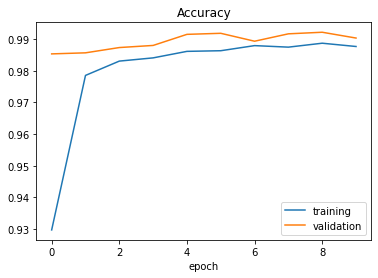

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

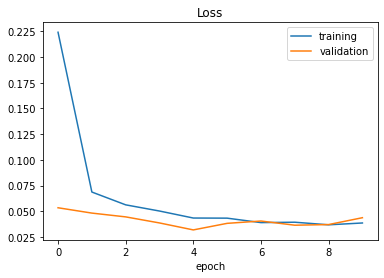

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03995500132441521
Test accuracy: 0.9869999885559082


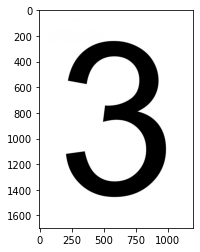

In [13]:
#predict internet number

# This block of code fetch and plot the image.
import requests
from PIL import Image
url = 'https://printables.space/files/uploads/download-and-print/large-printable-numbers/3-a4-1200x1697.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

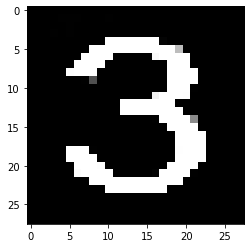

In [14]:
#This block of code ensures that the images are resized to the same size as
#our training data converts it to grayscale and inverts the foreground and 
#background colors and chirring,it's represented the same way as our training images.

import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [15]:
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 


(1, 28, 28, 1)


In [16]:
#This block of code actually passes our image into the model and makes a prediction.
print(img.shape)
print("predicted digit: "+str(np.argmax(model.predict(img), axis =-1 )))

(1, 28, 28, 1)
predicted digit: [3]


In [17]:
#Checking accuracy of our CNN model in detecting number in image
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.03995500132441521
Test accuracy: 0.9869999885559082


In [18]:
#we previously imported from  Keras, .models,the model class API is an incredibly useful tool as
#it allows us to define a model much in the same way as the sequential function we've become familiar
#with using the model class API allows us to instantiate layers from pre trained models, effectively
#allowing us to reuse sections of previously train models.We are going to take advantage of this ability
#to help us visualize the outputs from our two convolutional layers.



#We begin by defining our two layers on a separate cell, layer one and layer two.
#We define these functions using the model class API and now in the model function, we need to feed
#the appropriate arguments to create instances of the proper sections of our pre trained neural network.
#The model function requires two arguments, the first argument, the fines, all the inputs into your
#network, while the second argument defines the outputs that you want from the model.

layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)


#Run a prediction on them with our imported image.
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 


(1, 24, 24, 30)
(1, 10, 10, 15)


We can see that they have the shapes (1, 24, 24, 30) and (1, 10, 10, 15).
This essentially means that a visual layer1 contains 30 outputs, one for each filter of dimension 24 by 24, while visual layer2 contains 15 outputs and it's again one for each filter of dimension 10 by 10, which corresponds to the number of filters that we declared in each layer and what we have in our model summary.

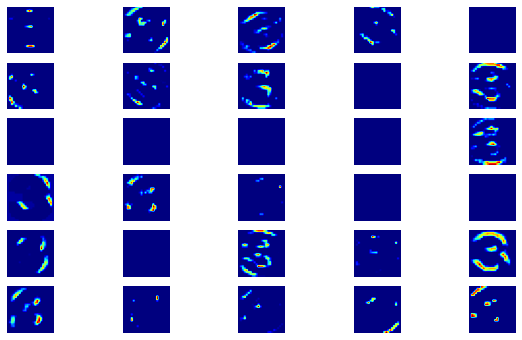

In [19]:
#Now, all we need to do is plot our values for each layer to get a visual idea of the features that
#our filters are extracting. So let's move forward and plot the output of the first layer.


#layer 1
plt.figure(figsize=(10, 6))

#first layer has 30 filters, we are going to expect 30 plots.So we create a for
#loop to cycle through all 30 of our filters for I in range 30.

for i in range(30):

#now inside the loop are going to plot all 30 of our images in a grid like pattern, let's use 'plt'
#that subplot.To create a grid that has 6 rows and 5 columns, to fit all 30 images, and now with each iteration
#of our loop, we want to plot the preceding image.So for our index value, we input 'i+1'.
#This will cycle through all our index values and place the 'i+1' image at its appropriate position.

    plt.subplot(6, 5, i+1)

#Next, we actually plot the appropriate image at this indexed position using 'plt.imshow()' we must
#initially define the output filter that we want.Since our output prediction values for each filter are
#stored inside the visual layer1 array we must call this array of visual layer1.
#And as you know earlier, the shape of this array 1 , 24, 24 and 30, therefore
#we access the first index zero.We then want all the pixels in the output shape. 
#So we splice our array accordingly with the proper notation.And finally, since we want to iterate through
#all of our 30 filters, we place the variable 'i' as our last index of value.This will ensure that our new 
#filter is printed with each iteration of our for a loop.And let's add a color map using 'plt.get_cmap(''))'.


    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 


Color Red highlighted the areas with the highest intensity, while the color Blue highlights areas with the lowest intensity.

As you can see, each filter learns to focus on different aspects of the image.In a way, each of these filters learns to recognize different features and patterns within the images.And this is exactly what makes Convolutional Neural Layer is so effective for image recognition, because when the output of all these filters is combined, the network gets a very good idea of what it's looking at.Using a similar code below and making small modifications, we can see the output of our second  convolutional layer.

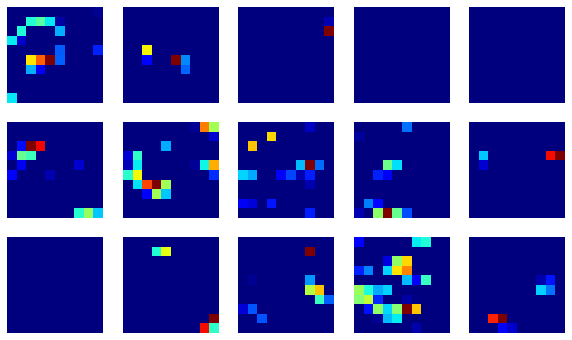

In [20]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

Color Red highlighted the areas with the highest intensity, while the color Blue highlights areas with the lowest intensity.

The above images appear to be a bit more abstract, and this makes perfect sense.we know how the feature maps start to become unrecognizable towards the very end as they contain less information about the image, but more information about the specific feature that's distinct to the kernel that was convolved on the image since the deeper you get into the neural network.Now we're in layer2.The filters become more and more complex, building on top of one another and becoming more sophisticated in terms of the high level shapes that they start encoding for these high level shapes are present in very specific parts of the image and so what you end up with are filters that only retain the information in the image that's relevant to it once again.Hence why the images start seeming unrecognizable as you go deeper into the layers.